In [1]:
# import pandas and json
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
# read json file into DataFrame
json_df = pd.read_json('./data/world_bank_projects.json')

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


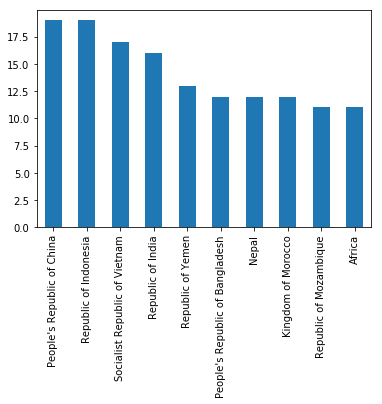

In [17]:
# find 10 countries with most projects 
most_projects = json_df.countryname.value_counts()[0:10]
print(most_projects)
most_projects.plot(kind='bar')

In [4]:
def count_project_theme(column):
    """count major project themes, generating a {theme:count} dict from a project column"""
    proj_count = {}
    for row in range(len(column)):    #loop through all rows in proj column
        for proj in column[row]:    #loop through all dict in the list in one cell
            if proj['name'] in proj_count.keys(): 
                proj_count[proj['name']] += 1
            else:
                proj_count[proj['name']] = 1
    return proj_count

In [7]:
def sort_project_by_count(proj_count_dict):
    """sort project:count dict by count into a list"""
    sorted_proj = []
    for proj_name in sorted(proj_count_dict, key=proj_count_dict.get, reverse=True):
        sorted_proj.append((proj_name, proj_count_dict[proj_name]))
    return sorted_proj

In [8]:
# find top 10 major project themes
mjt_proj_count = count_project_theme(json_df['mjtheme_namecode'])
mjt_proj_count_sorted = sort_project_by_count(mjt_proj_count)
print(mjt_proj_count_sorted[0:10])

[('Environment and natural resources management', 223), ('Rural development', 202), ('Human development', 197), ('Public sector governance', 184), ('Social protection and risk management', 158), ('Financial and private sector development', 130), ('', 122), ('Social dev/gender/inclusion', 119), ('Trade and integration', 72), ('Urban development', 47)]


In [27]:
# build a mjtheme_code:mjtheme_name dict from mjtheme_namecode Series to prepare for missing value imputation
mjt_namecode = json_df['mjtheme_namecode']
proj_code_name = {}
for row in range(len(mjt_namecode)):
    for proj in mjt_namecode[row]:    #loop through all rows in major theme project column
        if proj['name'] != '':    #only add non-NULL project names into project theme lists
            if proj['code'] in proj_code_name.keys():
                if proj['name'] not in proj_code_name[proj['code']]:
                    proj_code_name[proj['code']].append(proj['name'])
            else:
                proj_code_name[proj['code']] = []
                proj_code_name[proj['code']].append(proj['name'])
#print(proj_code_name)

In [12]:
# make a new major theme project namecode column for missing name imputation without changing the original column
json_df['mjtheme_namecode_imputed'] = json_df['mjtheme_namecode']
mjt_namecode_imputed = json_df['mjtheme_namecode_imputed']

In [13]:
# impute missing theme names with above generated proj_code_name dict
for row in range(len(mjt_namecode_imputed)):
    for proj in mjt_namecode_imputed[row]:
        if proj['name'] == '':
            proj['name'] = proj_code_name[proj['code']][0]

In [14]:
# find top 10 major project themes after imputing missing theme names
mjt_proj_count_imputed = count_project_theme(json_df['mjtheme_namecode_imputed'])
mjt_proj_count_imputed_sorted = sort_project_by_count(mjt_proj_count_imputed)
print(mjt_proj_count_imputed_sorted[0:10])

[('Environment and natural resources management', 250), ('Rural development', 216), ('Human development', 210), ('Public sector governance', 199), ('Social protection and risk management', 168), ('Financial and private sector development', 146), ('Social dev/gender/inclusion', 130), ('Trade and integration', 77), ('Urban development', 50), ('Economic management', 38)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

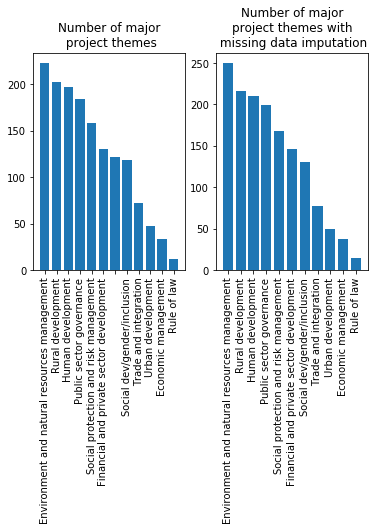

In [26]:
# plot top 10 major project themes before and after missing data imputation
plt.subplot(1,2,1)
x_val = [x[0] for x in mjt_proj_count_sorted]
y_val = [x[1] for x in mjt_proj_count_sorted]
plt.bar(x_val, y_val)
plt.title('Number of major\n project themes')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
x_val_imputed = [x[0] for x in mjt_proj_count_imputed_sorted]
y_val_imputed = [x[1] for x in mjt_proj_count_imputed_sorted]
plt.bar(x_val_imputed, y_val_imputed)
plt.title('Number of major\nproject themes with\n missing data imputation')
plt.xticks(rotation=90)
